# Exploring PCA & clustering

Overview:  in this learning activity, you will explore
* Using PCA for dimensionality reduction to convert from 3D to 2D on a toy problem
* Using PCA for dim reduction on a simplified version of MNIST
* Using clustering for preprocessing on a simplified version of MNIST

-----------------------------

## Part 1: Demonstration of PCA
Using PCA for feature reduction - Converting 3D features to 2D features
(note there is no student coding in this section)

In [2]:
"""
sources:  
    for the generated data:
    http://sebastianraschka.com/Articles/2014_pca_step_by_step.html
    example of SVD-based PCA
    http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html
"""
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns

### Create the 3D data

In [3]:
#-------------------------------------
# create the data
#-------------------------------------
np.random.seed(1) # random seed for consistency
c1_count = 100
c2_count = 100
total_count = c1_count+c2_count
mu_vec1 = np.array([0.,0.,0.])
cov_mat1 = np.array([[1.,0.,0.],[0.,1.,0.],[0.,0.,1.]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, c1_count)

mu_vec2 = np.array([1.5,1.5,1.5])
cov_mat2 = np.array([[1.,0.,0.],[0.,1.,0.],[0.,0.,1.]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, c2_count)


### Plot the data

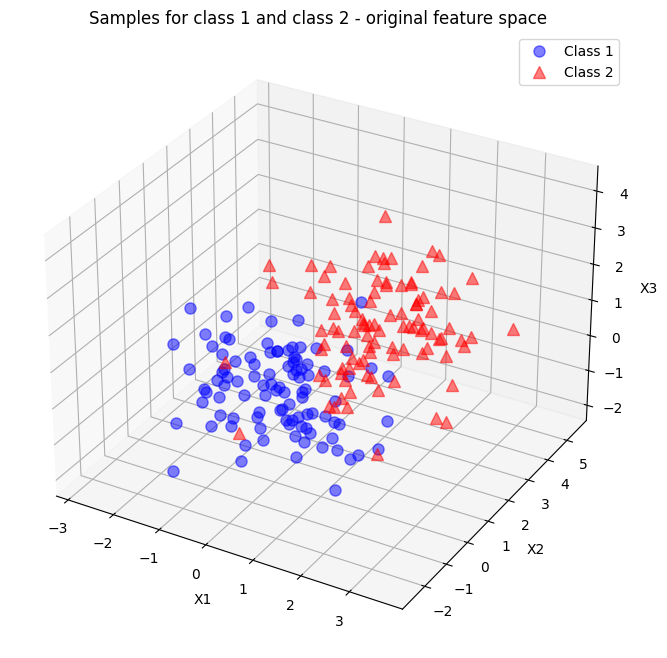

In [4]:
#-------------------------------------
# plot the data
#-------------------------------------
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[:,0], class1_sample[:,1], class1_sample[:,2], 'o', markersize=8, color='blue', alpha=0.5, label='Class 1')
ax.plot(class2_sample[:,0], class2_sample[:,1], class2_sample[:,2], '^', markersize=8, alpha=0.5, color='red', label='Class 2')

plt.title('Samples for class 1 and class 2 - original feature space')
plt.xlabel('X1')
plt.ylabel('X2')
ax.set_zlabel('X3')
ax.legend(loc='upper right')

plt.show()

In [5]:
#-------------------------------------
# concatenate all samples
#-------------------------------------
all_samples = np.concatenate((class1_sample, class2_sample), axis=0)
all_labels = np.vstack((np.ones((c1_count,1)),np.ones((c2_count,1))+1))
#print(all_labels)
all_data = np.hstack((all_samples,all_labels))
#print(all_data)



### Show pairs plots for feature exploration

<Figure size 1600x1600 with 0 Axes>

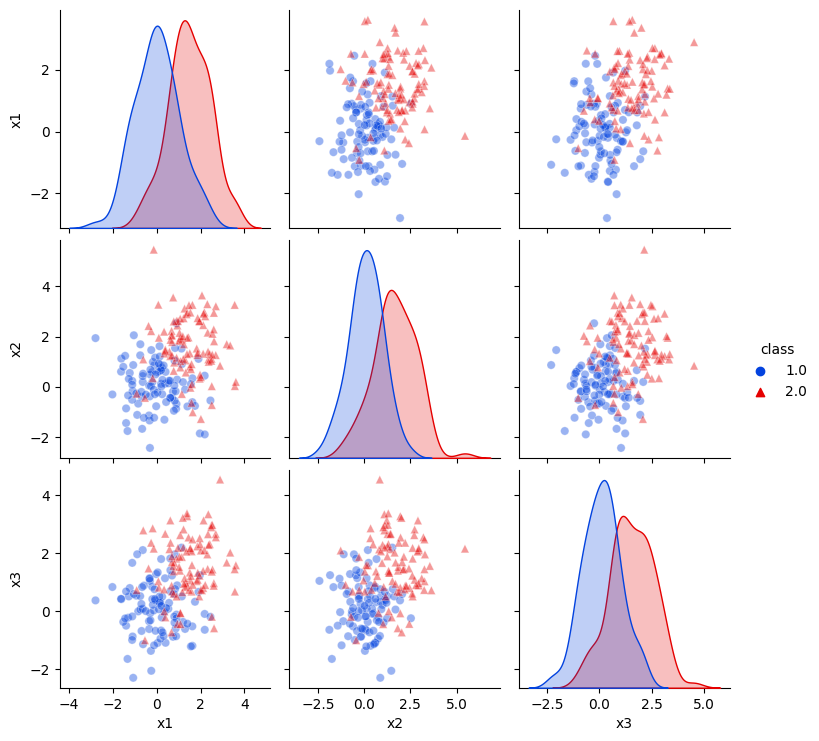

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      200 non-null    float64
 1   x2      200 non-null    float64
 2   x3      200 non-null    float64
 3   class   200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df = pd.DataFrame(all_data)
df.columns = ['x1', 'x2','x3','class']
mycolors = ["blue","red"]
plt.figure(figsize=(16, 16))
sns.pairplot(df, diag_kind='kde', plot_kws={'alpha':0.4}, markers=['o','^'],
             hue = 'class', palette=sns.xkcd_palette(mycolors))
plt.show()

df.info()

### Determine the Covariance Matrix

In [7]:
#-------------------------------------
# compute the covariance matrix
#-------------------------------------
cov_mat = np.cov(all_samples.T)
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[1.48858173 0.48726815 0.59894116]
 [0.48726815 1.70430466 0.5681851 ]
 [0.59894116 0.5681851  1.45874504]]


[0.7772151  0.91804372 1.        ]


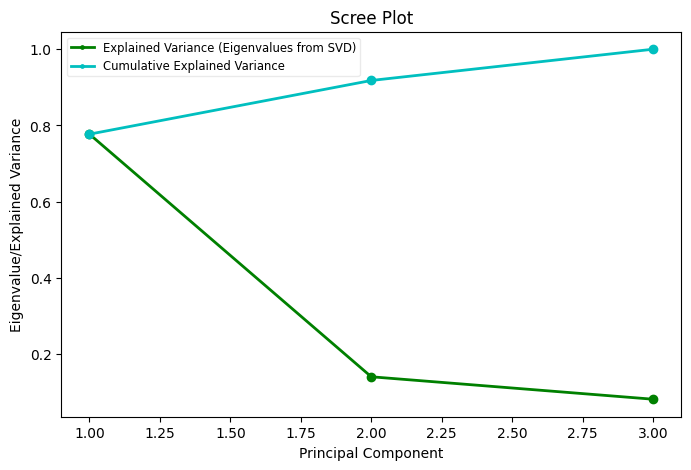

In [8]:
#-------------------------------------
# perform singular value decomposition
#-------------------------------------
u,s,v = np.linalg.svd(cov_mat)

#-------------------------------------
# compute eigenvalues
#-------------------------------------
num_vars = 3
num_obs = total_count
eigvals = s**2 / np.sum(s**2)  # NOTE (@amoeba): These are not PCA eigenvalues. 
                               # This question is about SVD.

#-------------------------------------
# make scree plot of variance explained per component
#-------------------------------------    
fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(num_vars) + 1
eig_cumulative = np.cumsum(eigvals)
print(eig_cumulative)
plt.plot(sing_vals, eigvals, 'go-', linewidth=2)
plt.plot(sing_vals, eig_cumulative, 'co-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue/Explained Variance')

#legend below, e.g. with smaller fonts and a bit transparent so I do not cover up data, and make
#it moveable by the viewer in case upper-right is a bad place for it 
leg = plt.legend(['Explained Variance (Eigenvalues from SVD)','Cumulative Explained Variance'], loc='best', borderpad=0.3, 
                 shadow=False, prop=matplotlib.font_manager.FontProperties(size='small'),
                 markerscale=0.4)
leg.get_frame().set_alpha(0.4)
#leg.draggable(state=True)
plt.show()

Based on the Scree plot it looks like 2 components will explain over 90% of the variance

### First, check performance with all 3 dimensions

In [9]:
#-------------------------------------
# choose all the components
# generate the projection matrix
#-------------------------------------
componentCount = 3

matrix_w = u[:,0:componentCount]
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.54708095  0.57448763 -0.60882378]
 [-0.61693301 -0.76830201 -0.17060389]
 [-0.56577036  0.28226934  0.77474378]]


### Rotate the data into the new basis

In [10]:
#-------------------------------------
# transform the data into the new basis with 3 dimensions
#-------------------------------------

transformed3 = all_samples.dot(matrix_w)


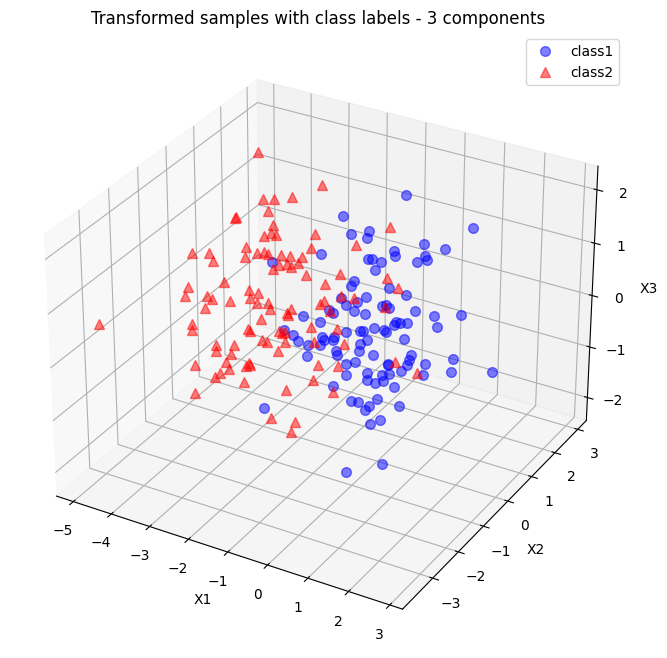

In [11]:
#-------------------------------------
# plot the newly transformed data
#-------------------------------------

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
plt.plot(transformed3[0:c1_count,0], transformed3[0:c1_count,1], transformed3[0:c1_count,2], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed3[c1_count:total_count,0], transformed3[c1_count:total_count,1], transformed3[c1_count:total_count,2], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.title('Samples for class 1 and class 2 - original feature space')
plt.xlabel('X1')
plt.ylabel('X2')
ax.set_zlabel('X3')
ax.legend(loc='upper right')
plt.title('Transformed samples with class labels - 3 components')

plt.show()

Lets examine the pairsplots for this data to see what PCA is doing with the new components.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      200 non-null    float64
 1   x2      200 non-null    float64
 2   x3      200 non-null    float64
 3   class   200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


<Figure size 1600x1600 with 0 Axes>

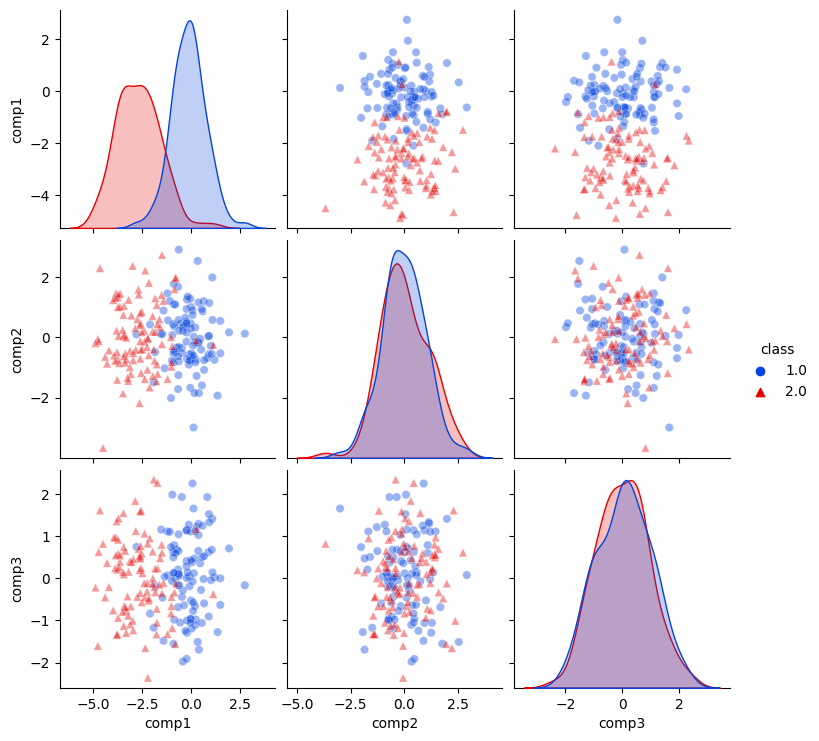

In [12]:
pcadf = pd.DataFrame(transformed3, columns=['comp1', 'comp2','comp3'])
pcadf["class"] = df["class"]
mycolors = ["blue","red"]
plt.figure(figsize=(16, 16))
sns.pairplot(pcadf, diag_kind='kde', plot_kws={'alpha':0.4}, markers=['o','^'],
             hue = 'class', palette=sns.xkcd_palette(mycolors))

df.info()
plt.show()

In [13]:
#-------------------------------------
# choose the components
# generate the projection matrix
#-------------------------------------
componentCount = 2

matrix_w = u[:,0:componentCount]
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.54708095  0.57448763]
 [-0.61693301 -0.76830201]
 [-0.56577036  0.28226934]]


In [14]:
#-------------------------------------
# transform the data into the new basis with 2 dimensions
#-------------------------------------

transformed2 = all_samples.dot(matrix_w)


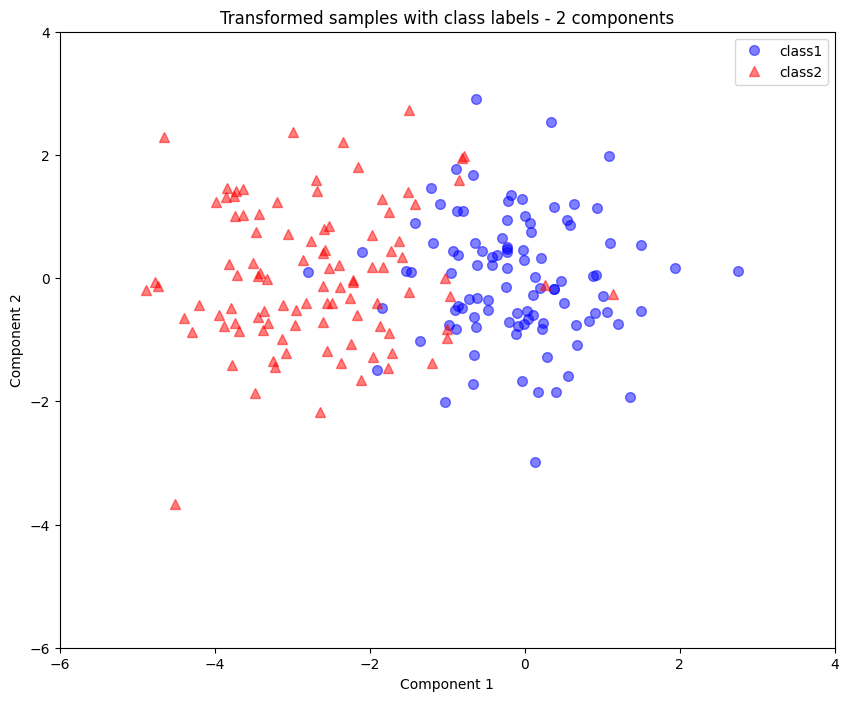

In [15]:
#-------------------------------------
# plot the newly transformed data
#-------------------------------------

plt.figure(figsize=(10, 8))
plt.plot(transformed2[0:c1_count,0], transformed2[0:c1_count,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed2[c1_count:total_count,0], transformed2[c1_count:total_count,1], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-6,4])
plt.ylim([-6,4])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.title('Transformed samples with class labels - 2 components')

plt.show()

Getting pretty good separation between classes with just 2 components

In [16]:
#-------------------------------------
# transform the data into the new basis with 1 dimension
#-------------------------------------

componentCount = 1

matrix_w1 = u[:,0:componentCount]
print('Matrix W(1):\n', matrix_w1)

transformed1 = all_samples.dot(matrix_w1)

#print("Transformed1: ", transformed1)


Matrix W(1):
 [[-0.54708095]
 [-0.61693301]
 [-0.56577036]]


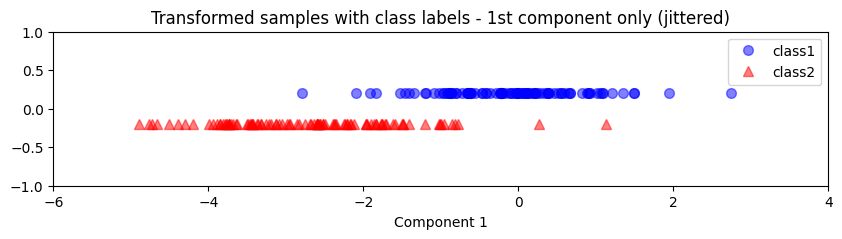

In [17]:
dim2 = np.zeros(transformed1.shape)
plt.figure(figsize=(10, 2))
plt.plot(transformed1[0:c1_count], dim2[0:c1_count]+0.2, 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed1[c1_count:total_count], dim2[c1_count:total_count]-0.2, '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-6,4])
plt.ylim([-1,1])
plt.xlabel('Component 1')
plt.legend()
plt.title('Transformed samples with class labels - 1st component only (jittered)')

plt.show()

One component gives us just under 80% of the explained variance... may have more difficulty classifying with one component

-----------------------

# Part 2:  Demonstration of PCA for dimensionality reduction

## CONTAINS STUDENT CODING ACTIVITIES

In this section you will explore using PCA as an unsupervised dimensionality reduction technique to preprocess features before supervised learning (classification)

(inspired by https://github.com/ageron/handson-ml2/blob/master/09_unsupervised_learning.ipynb)

In [18]:
from sklearn.datasets import load_digits
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.datasets import fetch_openml

#### NOTE:  this step might take a moment to download the data

In [19]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)
X_digits = mnist["data"]
y_digits = mnist["target"]
mnistshape=(28,28)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X_digits, y_digits, random_state=42)

#### Data Exploration:
Lets display some of these digits - we will make a helper function to do so

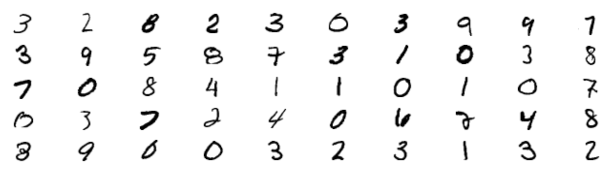

Training Observation Count:  52500
Training Feature Count:  784


In [22]:
# helper function to display some digits
def show_digits(count=20,data=None,shape=(8,8)):
    plt.figure(figsize=(8, 2))
    for index, instance in enumerate(data[0:digits_to_show,:]):
        plt.subplot(digits_to_show // 10, 10, index+1 )
        plt.imshow(instance.reshape(shape), cmap="binary", interpolation="bilinear")
        plt.axis('off')
    plt.show()

    
digits_to_show = 50
  
show_digits(digits_to_show,data=X_train,shape=(28,28)) 
print("Training Observation Count: ",X_train.shape[0])
print("Training Feature Count: ",X_train.shape[1])

#### Basic Model fit (logistic regression)
Now let's fit a Logistic Regression model with ALL the training data and evaluate it on the test set:

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [24]:
lda = LinearDiscriminantAnalysis()

lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [25]:
lda_score = lda.score(X_val, y_val)
print(lda_score)

0.8686857142857143


Okay, that's our baseline: 86.9% accuracy using LDA on the full training set. Let's see if we can do better by using PCA to preprocess the data in an sklearn pipeline

But before we do that, lets see what PCA does to the data with various numbers of components

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA 

#### Display the PCA cumulative explained variance ratio per component
In the graph below we can see how much variance of the original data is in each of the components (pixels) of the data.  Only a portion of the 784 components are used. We can use this graph to inform the student coding section next

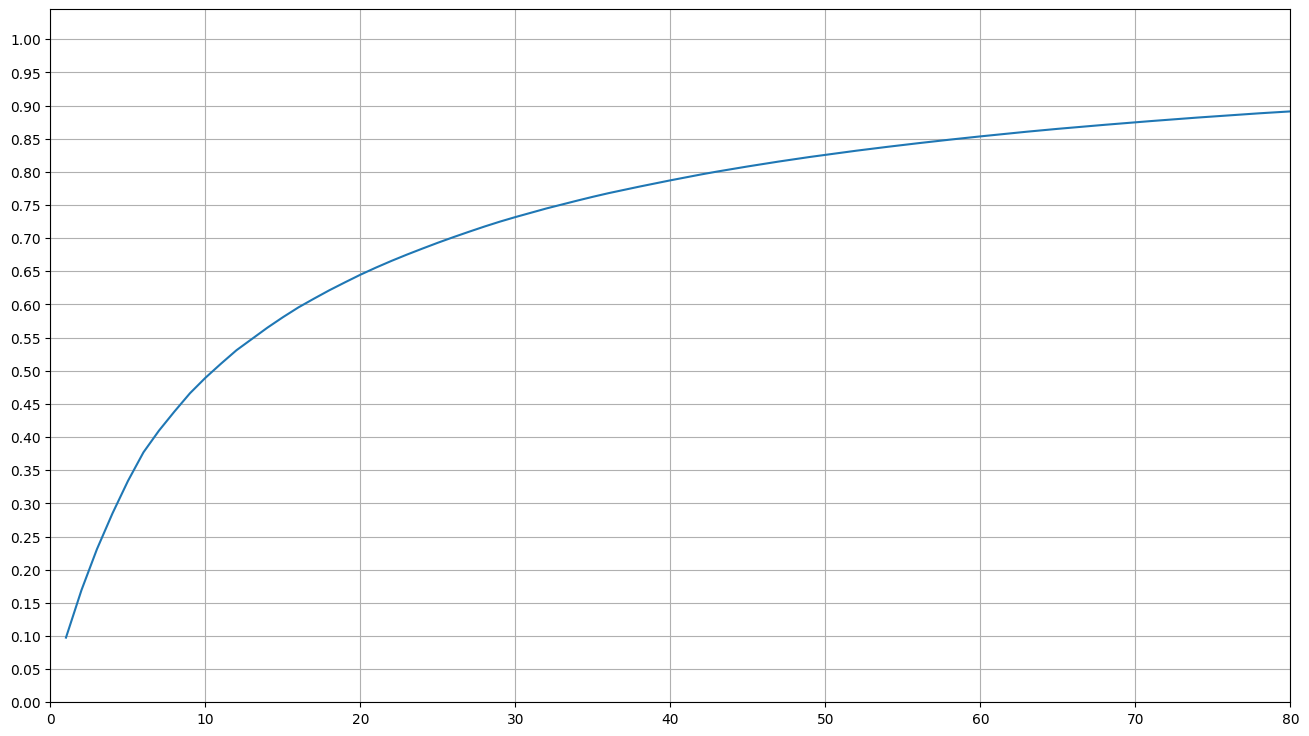

In [27]:
pca = PCA(X_train.shape[1])  #the no-loss PCA transform
pca.fit_transform(X_train)
evr = pca.explained_variance_ratio_
fig = plt.figure(figsize = (16,9))
ax = fig.add_subplot(1,1,1)
percent_ticks = np.linspace(0, 1.00, 21)
component_index = np.arange(1,X_train.shape[1]+1,1)
plt.plot(component_index,np.cumsum(evr))
ax.set_yticks(percent_ticks)
component_ticks=[1,3,10,30,100,300]
#ax.set_xticks(component_ticks)
ax.set_xlim(0,80)
plt.grid()
plt.show()


Notice that little of the variance is explained with a single component, yet the amount of variance in the data grows quickly (more than 50% of the explained variance is present if we retain the first 10 components... and by the retaining the first 50 components, over 80% of the data is explained.

## STUDENT CODING STEP 1
### Explore choosing number of components to keep

In this next step, modify the value of the ```num_components_to_keep``` trying various values from 1 up to the number of features in MNIST (784) to see how the PCA inverse transform on a subset of the components yields a lossy represnetation of the original images in MNIST.  Do you see how the reproduced digits lose more information the fewer PCA components are kept?



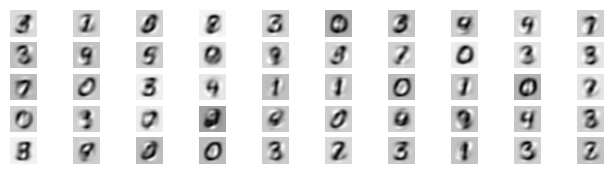

Explained Variance for  8  components is  0.43854471115257126


In [39]:
# -------------- STUDENT CODING HERE -------------

num_components_to_keep = 8   # MIN = 1, max = 784 (the number of features in the data)

#--------------- END STUDENT CODING HERE ----------

pca = PCA(num_components_to_keep)
X_train_transformed = pca.fit_transform(X_train)
X_train_lossy = pca.inverse_transform(X_train_transformed)

evrc = np.sum(pca.explained_variance_ratio_)

mnistshape=(28,28)
show_digits(digits_to_show,data=X_train_lossy,shape=mnistshape)  
print("Explained Variance for ",num_components_to_keep," components is ",evrc)

## STUDENT CODING STEP 2
### Select number of components to keep
After you have tried a few options for ```num_components_to_keep```, select one in which you think the classifier might work well (either using the explained variance graph above, or using your judgement based on the visualization of the digits) and then enter that value in the location below

In [53]:
# -------------- STUDENT CODING HERE -------------

num_components_to_keep = 8   #max = 784 (the number of features in the data)

#--------------- END STUDENT CODING HERE ----------

Next we are going to build and compare two pipelines: one which will use PCA (with components count of ```num_components_to_keep``` and one which will not use PCA... but both will fit a LDA model - which should train fairly quickly even on a large MNIST dataset.

In [54]:
pipeline_lda = Pipeline([
    ("lda", LinearDiscriminantAnalysis()),
])

pipeline_pca_lda = Pipeline([
    ("pca", PCA(n_components=num_components_to_keep)),
    ("lda", LinearDiscriminantAnalysis()),
])

Now lets pretend our dataset was much smaller... only 50 training datapoints.  How good is our model? 

In [55]:
small_obs_count=1000
X_train_small,_,y_train_small,_ = train_test_split(X_train, y_train, 
                                                   train_size=small_obs_count,  random_state=42)
#note the "_" represents a set of returned values we are ignoring
print("Original training set obs count:", X_train.shape[0])

print("Reduced training set obs count:", X_train_small.shape[0])


Original training set obs count: 52500
Reduced training set obs count: 1000


In [56]:
pipeline_lda.fit(X_train_small, y_train_small)

pipeline_pca_lda.fit(X_train_small, y_train_small)

lda_only_score = pipeline_lda.score(X_val, y_val)
pca_lda_score = pipeline_pca_lda.score(X_val, y_val)

print("LDA only score:", lda_only_score,"\nPCA then LDA score:", pca_lda_score)

LDA only score: 0.6682857142857143 
PCA then LDA score: 0.7448


Note that the scores shown above are 10-class classification scores for the MNIST digits - chance accuracy is 10%

We can see that performaning PCA first then LDA, even with a modest number of components,  vastly outperform LDA alone when all features 784 are available

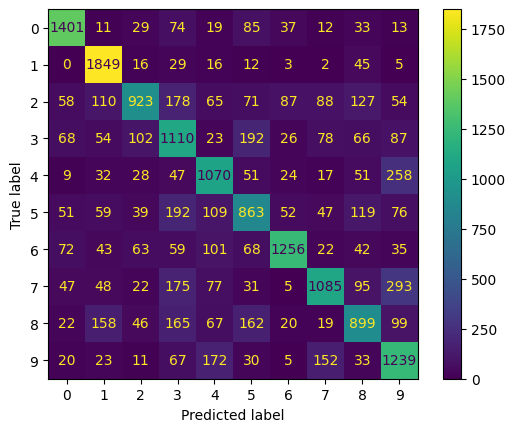

In [57]:
ConfusionMatrixDisplay.from_estimator(pipeline_lda,X_val, y_val)
plt.show()

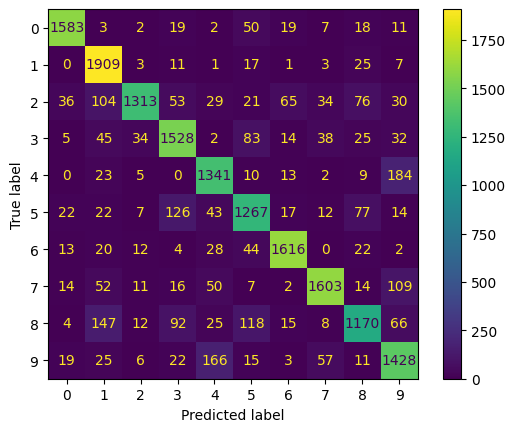

In [40]:
ConfusionMatrixDisplay.from_estimator(pipeline_pca_lda,X_val, y_val) 
plt.show()

------------------------------------------

## Part 3:  Using Clustering for Semi-supervised learning

## INCLUDES STUDENT CODING

In this section you will explore using clustering as a performance-improvement preprocessing step prior to classification.  

Semisupervised learning includes activities such as:
* Clustering data using only features, and labeling 1 observation from each cluster
* Propagating the labels of the truth-labeled observation to other members of the cluster
* Choosing to use only a fraction of the cluster members which are close to the center of the cluster as representative exemplars for the cluster

You will explore some of these ideas in this part

As a reminder:
Clustering only uses the feature values (X) information to make clusters - it doesnt consider truth labels.   In order to evaluate an unsupervised or semisupervised method's performance in supervised learning activities such as classfication, the truth labels must be known (validation set or test set must be truth-labeled)


In [41]:
n_labeled = 50

Obtain the baseline performance for LDA if we only train it with 50 labeled examples of MNIST

LDA score using only 50 randomly-selected training examples
 0.4565714285714286


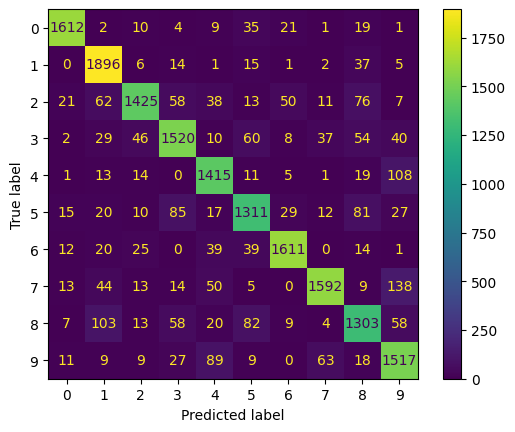

In [42]:
lda_50rand = LinearDiscriminantAnalysis()
lda_50rand.fit(X_train[:n_labeled], y_train[:n_labeled])
lda_50rand_score = lda_50rand.score(X_val, y_val)
print("LDA score using only 50 randomly-selected training examples\n", lda_50rand_score)
ConfusionMatrixDisplay.from_estimator(lda,X_val,y_val)
plt.show()

While the MNIST performance is better than chance here, 

Now lets use KMeans clustering to unsupervised-cluster the training data (based on only the feature values), then we will hand lablel 50 instances (1 per cluster) and propagate our 50 known labels into the other members of each clusters

In [43]:
from sklearn.cluster import KMeans
k = 50  #cluster count

#### NOTE:  the KMeans clustering algorithm may take a moment to think

In [44]:
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt: 


## STUDENT CODING STEP 3
In the cell below you will need to manually label the observations by typing the digits you see in the box below.  The shape of the resulting array should be ``(50,)``

Also note that you might find the numbers already match in code... but this depends on the random train/test split in earlier code

Now let's plot these representative images and label them manually:

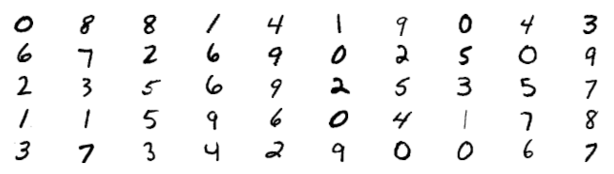

In [45]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(mnistshape), cmap="binary", interpolation="bilinear")
    plt.axis('off')

plt.show()

### IMPORTANT - STUDENT MUST PROVIDE LABELS FOR THE DIGITS IN THE CODE BELOW!

In [46]:
#------------- STUDENT CODING ---------------

# Make this array contain the handwritten numbers displayed above
y_representative_digits = np.array([
    0, 8, 8, 1, 4, 1, 9, 0, 4, 3,
    6, 7, 2, 6, 9, 0, 2, 5, 0, 9,
    2, 3, 5, 6, 9, 2, 5, 3, 5, 7,
    1, 1, 5, 9, 6, 0, 4, 1, 7, 8,
    3, 7, 3, 4, 2, 9, 0, 0, 6, 7])

# -----------END STUDENT CODING ----------------

print(y_representative_digits.shape)


(50,)


Now we have a dataset with just 50 labeled instances, but instead of being completely random instances, each of them is a representative image of its cluster. Let's see if the performance is any better:

representative sample count (50,)
Score from training 50 labeled examples selected from the clusters: 0.6184


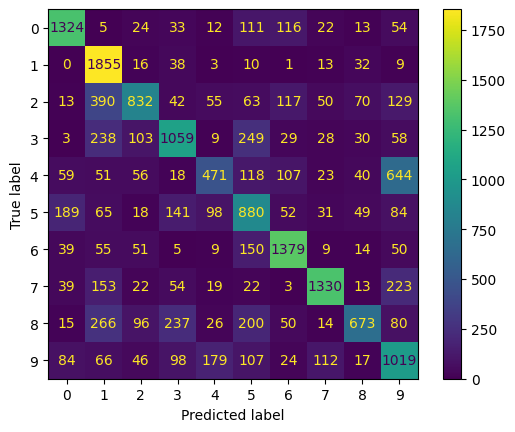

In [47]:
print("representative sample count", y_representative_digits.shape)

lda_50rep = LinearDiscriminantAnalysis()
lda_50rep.fit(X_representative_digits, y_representative_digits)
lda_50rep_score = lda_50rep.score(X_val, y_val)
print("Score from training 50 labeled examples selected from the clusters:", lda_50rep_score)
ConfusionMatrixDisplay.from_estimator(lda_50rep,X_val,y_val)
plt.show()

representative sample count (50,)
Score from training 50 labeled examples selected from the clusters: 0.6184


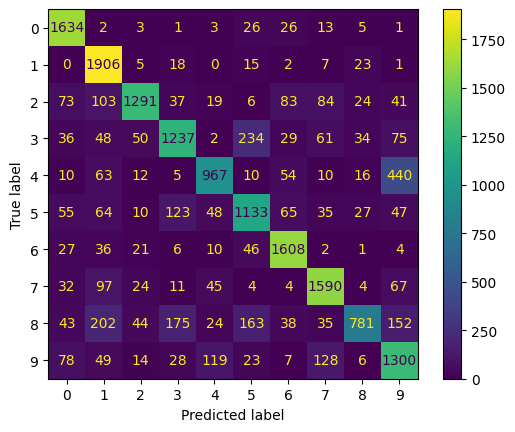

In [59]:
from sklearn.svm import LinearSVC
print("representative sample count", y_representative_digits.shape)

scv_50rep = LinearSVC()
scv_50rep.fit(X_representative_digits, y_representative_digits)
scv_50rep_score = scv_50rep.score(X_val, y_val)
print("Score from training 50 labeled examples selected from the clusters:", lda_50rep_score)
ConfusionMatrixDisplay.from_estimator(scv_50rep,X_val,y_val)
plt.show()

it is an improvement... better than using 50 random instances for training.

Now lets use those labeled examples to label the other data in their respective clusters - but only those close to the centers of the clusters.

In [48]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

## STUDENT CODING STEP 4

In the code cell below select the percentile of training examples which are closest to a cluster center to use for semisupervised learning and train a better classifier.  Consider values between 1 and 100.  Note that selecting a value of 100 will use all the cluster members, even if they are very close to other clusters... while selecting a value of 1 would perform very little pseuodolableling because rougly 99% of the observations in the training set would remain unlabled.  

In [49]:
# ------------- STUDENT CODING HERE -------------------

percentile_closest = 80

# ------------- END STUDENT CODING ---------------------


X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [50]:
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [51]:
lda_ssl_propagated = LinearDiscriminantAnalysis()
lda_ssl_propagated.fit(X_train_partially_propagated, y_train_partially_propagated)

LinearDiscriminantAnalysis()

Score from training 50 labeled examples, with label propagation to  80 % of the data closest to the cluster centers:
 0.7918857142857143


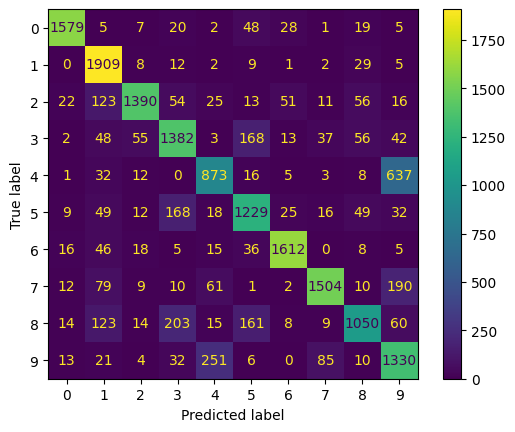

In [52]:

lda_ssl_propagated_score = lda_ssl_propagated.score(X_val, y_val)
print("Score from training 50 labeled examples, with label propagation to ",
      percentile_closest,"% of the data closest to the cluster centers:\n",
      lda_ssl_propagated_score)
ConfusionMatrixDisplay.from_estimator(lda_ssl_propagated,X_val,y_val)
plt.show()

Excellent!  With just 50 smartly chosen labeled examples, by propagating the labels to the unsupervised-kmeans clusters we are getting far better than chance accuracy on MNIST.   